In [ ]:
# get model here: https://huggingface.co/jinhybr/OCR-DocVQA-Donut
# model was trained on: https://openaccess.thecvf.com/content/WACV2021/papers/Mathew_DocVQA_A_Dataset_for_VQA_on_Document_Images_WACV_2021_paper.pdf

In [1]:
from transformers import DonutProcessor, VisionEncoderDecoderModel
import torch

processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Downloading:   0%|          | 0.00/803M [00:00<?, ?B/s]

c:\Users\monox\anaconda3\envs\transformer_env\lib\site-packages\huggingface_hub-0.11.1-py3.8.egg\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\monox\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development


In [ ]:
# from datasets import load_dataset

# # load document image from the DocVQA dataset
# dataset = load_dataset("hf-internal-testing/example-documents", split="test")
# image = dataset[1]["image"]

# print(type(image))
# image

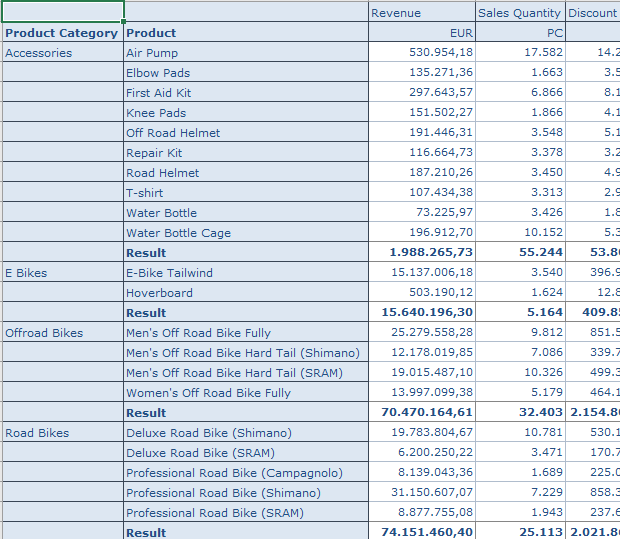

In [19]:
from PIL import Image
image = Image.open("./DONUT_Examples/cropped.png").convert('RGB')
image

In [40]:
# prepare decoder inputs
question = "what are the following 3 rows after air pump"

task_prompt = "<s_docvqa><s_question>{user_input}</s_question><s_answer>"
prompt = task_prompt.replace("{user_input}", question)

In [41]:
decoder_input_ids = processor.tokenizer(prompt, add_special_tokens=False, return_tensors="pt").input_ids
pixel_values = processor(image, return_tensors="pt").pixel_values

In [42]:
outputs = model.generate(
    pixel_values,
    decoder_input_ids=decoder_input_ids,
    max_length=model.decoder.config.max_position_embeddings,
    early_stopping=True,
    pad_token_id=processor.tokenizer.pad_token_id,
    eos_token_id=processor.tokenizer.eos_token_id,
    use_cache=True,
    num_beams=1,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
    return_dict_in_generate=True,
)

In [43]:
sequence = processor.batch_decode(outputs.sequences)[0]
sequence

'<s_docvqa><s_question> what are the following 3 rows after air pump</s_question><s_answer> 530.954,18</s_answer></s>'

In [44]:
import re
sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token
print(processor.token2json(sequence))


{'question': 'what are the following 3 rows after air pump', 'answer': '530.954,18'}
